In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv


### Data overview

In [2]:
# importing library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score
from xgboost import XGBClassifier


In [3]:
# loading data
df_application = pd.read_csv('/kaggle/input/credit-card-approval-prediction/application_record.csv')
df_credit = pd.read_csv('/kaggle/input/credit-card-approval-prediction/credit_record.csv')

In [4]:
df_application.sample(5)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
234360  6571028           M            Y               N             0   
138876  5668478           M            Y               Y             0   
330059  6336020           F            N               Y             0   
21630   6618654           F            N               Y             1   
200377  5899051           M            Y               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
234360           81000.0               Working  Secondary / secondary special   
138876          441000.0  Commercial associate  Secondary / secondary special   
330059           67500.0             Pensioner  Secondary / secondary special   
21630           157500.0               Working  Secondary / secondary special   
200377           90000.0               Working  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
234360            Married  House / apartment      -12086          -4600   
138876            Married  House / apartment      -14536           -170   
330059            Married  House / apartment      -24177         365243   
21630             Married  House / apartment      -14510          -3805   
200377            Married  House / apartment      -18119          -1030   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
234360           1                1           0           0      Core staff   
138876           1                0           0           0         Drivers   
330059           1                0           1           0             NaN   
21630            1                0           0           0      Core staff   
200377           1                1           0           1         Drivers   

        CNT_FAM_MEMBERS  
234360              2.0  
138876              2.0  
330059              2.0  
21630               3.0  
200377              2.0

In [5]:
df_credit.sample(5)

ID  MONTHS_BALANCE STATUS
928146  5126285             -38      0
287877  5025153             -30      0
724785  5097132              -8      C
692909  5094890             -33      X
9012    5002131             -22      0

In [6]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [8]:
df_application.shape

(438557, 18)

In [9]:
df_credit.shape

(1048575, 3)

In [10]:
# df = pd.merge(df_application, df_credit, on='ID',how='left')
# mreging data
df = pd.merge(df_application, df_credit, on='ID', how='inner')

In [11]:
df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008804           M            Y               Y             0   
2       5008804           M            Y               Y             0   
3       5008804           M            Y               Y             0   
4       5008804           M            Y               Y             0   
...         ...         ...          ...             ...           ...   
777710  5150337           M            N               Y             0   
777711  5150337           M            N               Y             0   
777712  5150337           M            N               Y             0   
777713  5150337           M            N               Y             0   
777714  5150337           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0          Working               Higher education   
1               427500.0          Working               Higher education   
2               427500.0          Working               Higher education   
3               427500.0          Working               Higher education   
4               427500.0          Working               Higher education   
...                  ...              ...                            ...   
777710          112500.0          Working  Secondary / secondary special   
777711          112500.0          Working  Secondary / secondary special   
777712          112500.0          Working  Secondary / secondary special   
777713          112500.0          Working  Secondary / secondary special   
777714          112500.0          Working  Secondary / secondary special   

          NAME_FAMILY_STATUS NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage  Rented apartment      -12005          -4542   
1             Civil marriage  Rented apartment      -12005          -4542   
2             Civil marriage  Rented apartment      -12005          -4542   
3             Civil marriage  Rented apartment      -12005          -4542   
4             Civil marriage  Rented apartment      -12005          -4542   
...                      ...               ...         ...            ...   
777710  Single / not married  Rented apartment       -9188          -1193   
777711  Single / not married  Rented apartment       -9188          -1193   
777712  Single / not married  Rented apartment       -9188          -1193   
777713  Single / not married  Rented apartment       -9188          -1193   
777714  Single / not married  Rented apartment       -9188          -1193   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                1           0           0             NaN   
3                1                1           0           0             NaN   
4                1                1           0           0             NaN   
...            ...              ...         ...         ...             ...   
777710           1                0           0           0        Laborers   
777711           1                0           0           0        Laborers   
777712           1                0           0           0        Laborers   
777713           1                0           0           0        Laborers   
777714           1                0           0           0        Laborers   

        CNT_FAM_MEMBERS  MONTHS_BALANCE STATUS  
0                   2.0               0      C  
1                   2.0              -1      C  
2                   2.0              -2      C  
3                   2.0              -3      C  
4                   2.0              -4      C  
...                 ...             ...    

In [12]:
print('Application Record data shape: ',df_application.shape)
print('Credit Record data shape: ',df_credit.shape)
print('Merged data shape: ',df.shape)

Application Record data shape:  (438557, 18)
Credit Record data shape:  (1048575, 3)
Merged data shape:  (777715, 20)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [14]:
# checking duplicate value
df.duplicated().sum()

0

In [15]:
# checking null value
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [16]:
df.isnull().sum()/df.shape[0]*100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.865806
CNT_FAM_MEMBERS         0.000000
MONTHS_BALANCE          0.000000
STATUS                  0.000000
dtype: float64

In [17]:
df["OCCUPATION_TYPE"].value_counts()

OCCUPATION_TYPE
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: count, dtype: int64

In [18]:
df["OCCUPATION_TYPE"].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [19]:
# dropping null value 
df.dropna(inplace=True)

In [20]:
df.shape

(537667, 20)

In [21]:
# checking data after dropping null value
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537667 entries, 31 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  int64  
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_INCOME_TYPE     537667 non-null  object 
 7   NAME_EDUCATION_TYPE  537667 non-null  object 
 8   NAME_FAMILY_STATUS   537667 non-null  object 
 9   NAME_HOUSING_TYPE    537667 non-null  object 
 10  DAYS_BIRTH           537667 non-null  int64  
 11  DAYS_EMPLOYED        537667 non-null  int64  
 12  FLAG_MOBIL           537667 non-null  int64  
 13  FLAG_WORK_PHONE      537667 non-null  int64  
 14  FLAG_PHONE           537667 non-null  int64  
 15  FLAG_EMAIL           

In [22]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

# EDA

<Axes: >

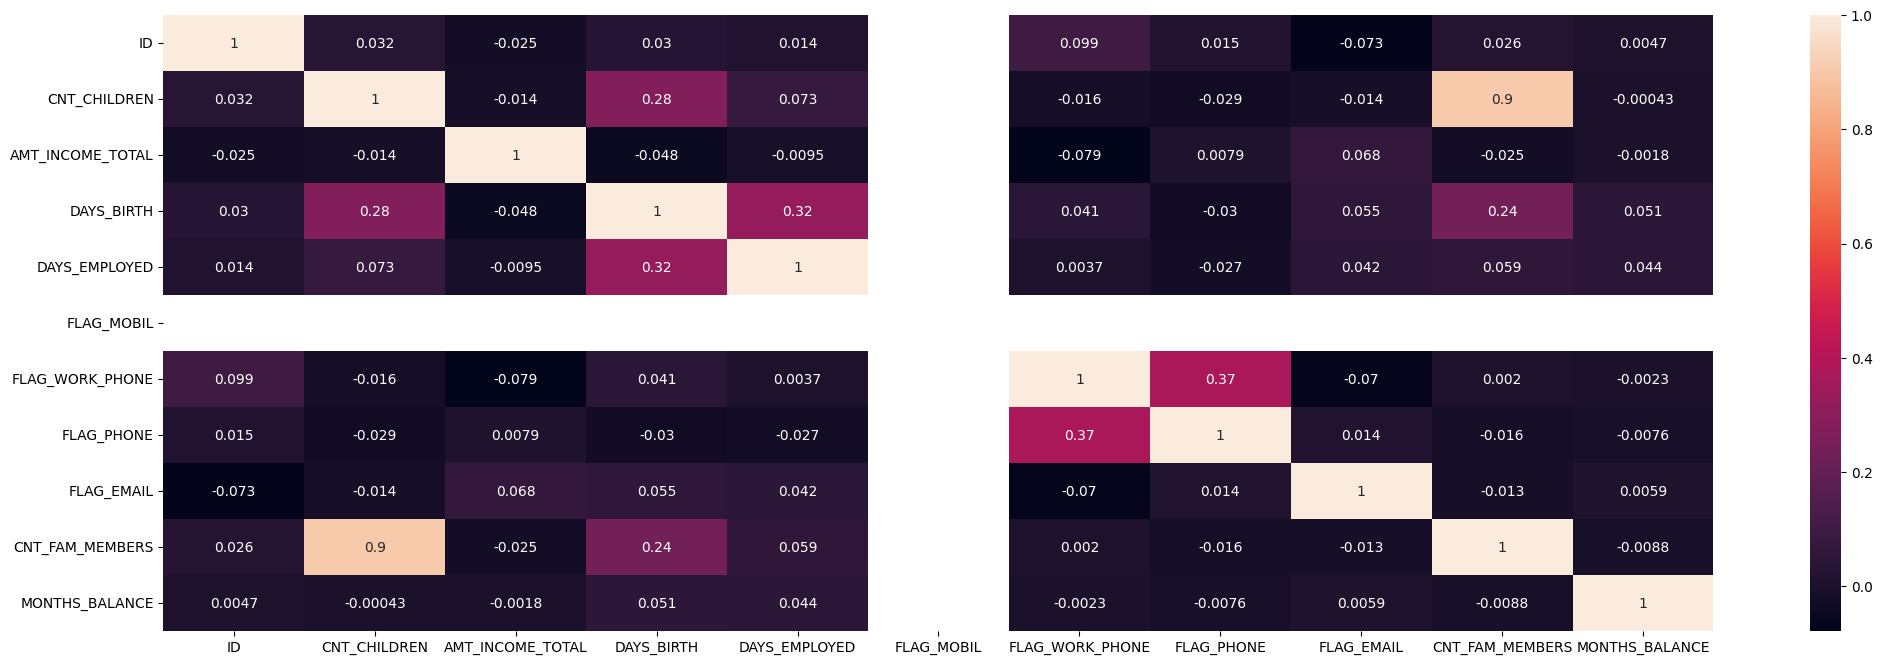

In [23]:
# correlation matrix
plt.figure(figsize=(25,8))
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True)

In [24]:
df["CODE_GENDER"].value_counts()

CODE_GENDER
F    333832
M    203835
Name: count, dtype: int64

In [25]:
Categorical=df.select_dtypes(include='object').columns.tolist()
Categorical

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'STATUS']

In [26]:
df["FLAG_OWN_CAR"].value_counts()

FLAG_OWN_CAR
N    306207
Y    231460
Name: count, dtype: int64

In [27]:
# df["FLAG_OWN_CAR"].value_counts()

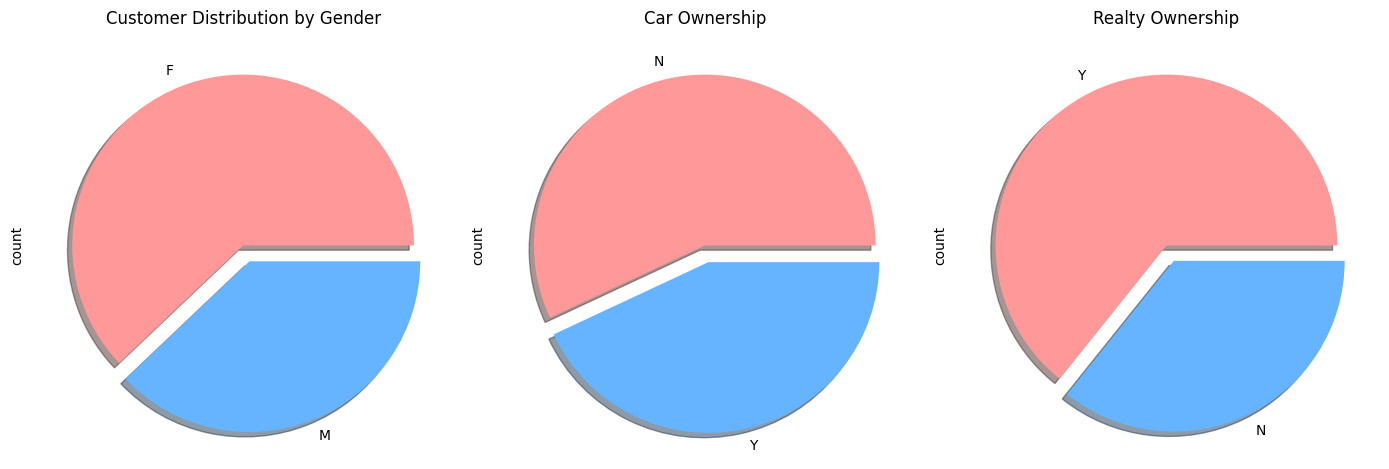

In [28]:
fig, axes = plt.subplots(1,3)
colors = ['#ff9999', '#66b3ff']

g1= df['CODE_GENDER'].value_counts().plot.pie(explode=[0,0.1], ax=axes[0], colors=colors, shadow=True)
g1.set_title("Customer Distribution by Gender")

g2= df['FLAG_OWN_CAR'].value_counts().plot.pie(explode=[0,0.1], ax=axes[1],   colors=colors, shadow=True)
g2.set_title("Car Ownership")

g3= df['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0,0.1], ax=axes[2],   colors=colors, shadow=True)
g3.set_title("Realty Ownership")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

In [29]:
# plt.figure(figsize=(6,6))
# colors = ['#ff9999', '#66b3ff']
# explode = (0, 0.1)
# plt.pie(x=df['CODE_GENDER'].value_counts().values, labels=['Female', 'Male'], 
#         autopct='%.1f%%', startangle=90, explode=explode, colors=colors, shadow=True)
# plt.legend(title="Gender", loc="upper right")
# plt.title("Gender Distribution")
# plt.show()

In [30]:


# plt.figure(figsize=(6,6))
# colors = ['#ff9999', '#66b3ff']
# explode = (0, 0.1)
# plt.pie(x=df["FLAG_OWN_CAR"].value_counts().values, labels=['YES', 'NO'], 
#         autopct='%.1f%%', startangle=90, explode=explode, colors=colors, shadow=True)
# plt.legend(title="Having Car", loc="upper right")
# plt.title("Having Car Distribution")
# plt.show()

In [31]:
# df["FLAG_OWN_REALTY"].value_counts()

In [32]:
# sns.countplot (x='FLAG_OWN_REALTY',data=df)
# plt.xticks([0,1],['Y','N'])

In [33]:
df["NAME_INCOME_TYPE"].value_counts()

NAME_INCOME_TYPE
Working                 332868
Commercial associate    151412
State servant            52733
Pensioner                  332
Student                    322
Name: count, dtype: int64

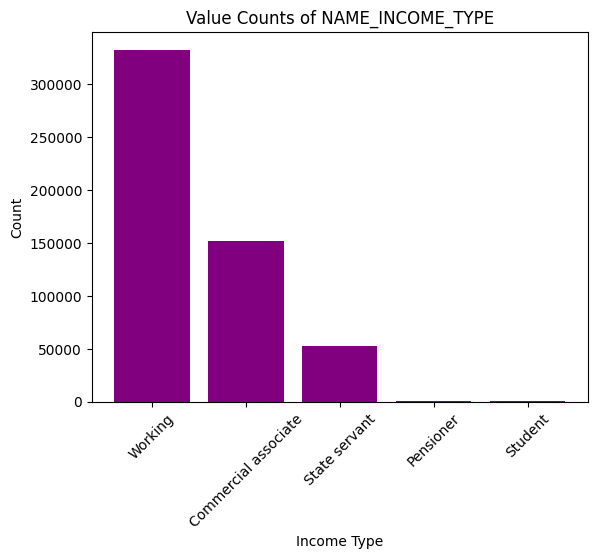

In [34]:
plt.bar(df["NAME_INCOME_TYPE"].value_counts().index, df["NAME_INCOME_TYPE"].value_counts().values, color='Purple')



# Add labels and title
plt.xlabel("Income Type")
plt.ylabel("Count")
plt.title("Value Counts of NAME_INCOME_TYPE")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.show()

In [35]:
df["NAME_EDUCATION_TYPE"].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    358317
Higher education                 153770
Incomplete higher                 20590
Lower secondary                    4556
Academic degree                     434
Name: count, dtype: int64

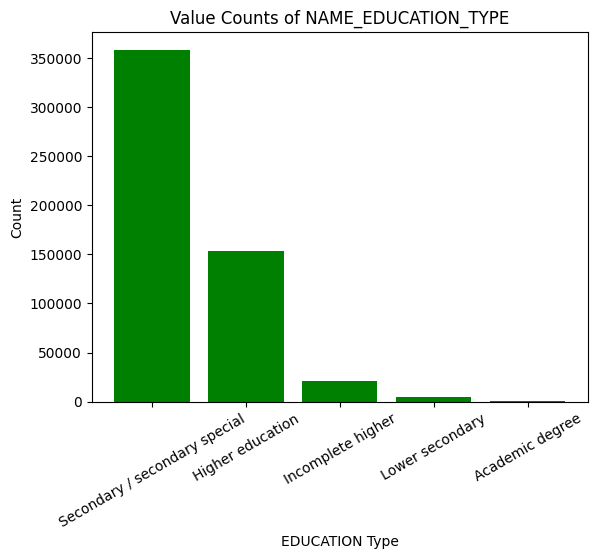

In [36]:
plt.bar(df["NAME_EDUCATION_TYPE"].value_counts().index, df["NAME_EDUCATION_TYPE"].value_counts().values,color='green')
# Add labels and title
plt.xlabel("EDUCATION Type")
plt.ylabel("Count")
plt.title("Value Counts of NAME_EDUCATION_TYPE")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=30)

# Show plot
plt.show()

In [37]:
df["NAME_FAMILY_STATUS"].value_counts()

NAME_FAMILY_STATUS
Married                 384003
Single / not married     65944
Civil marriage           44083
Separated                31394
Widow                    12243
Name: count, dtype: int64

<Axes: ylabel='NAME_FAMILY_STATUS'>

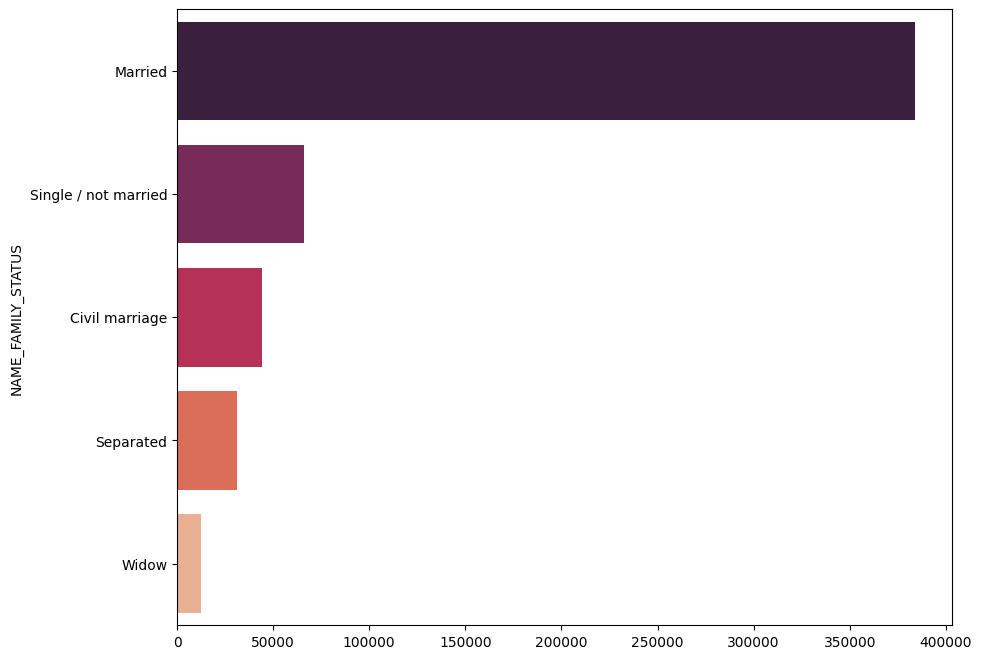

In [38]:
plt.figure(figsize=(10, 8))

sns.barplot(data=df,
            y=df["NAME_FAMILY_STATUS"].value_counts().index,
            x=df["NAME_FAMILY_STATUS"].value_counts().values,
            palette='rocket')

In [39]:
df["OCCUPATION_TYPE"].value_counts()

OCCUPATION_TYPE
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: count, dtype: int64

<Axes: ylabel='OCCUPATION_TYPE'>

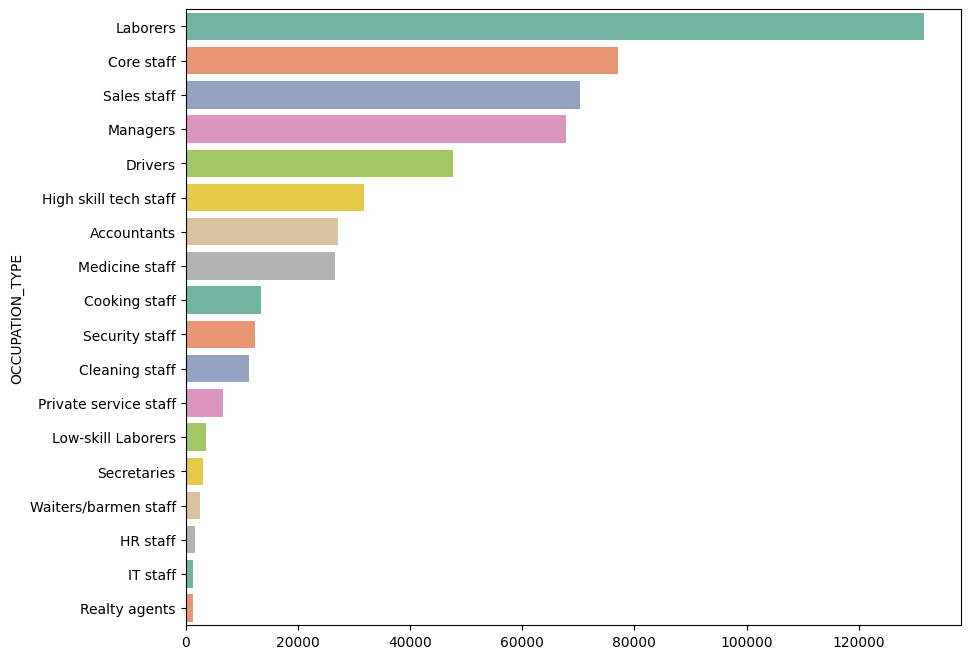

In [40]:
plt.figure(figsize=(10, 8))

sns.barplot(data=df,
            y=df["OCCUPATION_TYPE"].value_counts().index,
            x=df["OCCUPATION_TYPE"].value_counts().values,
            palette='Set2')

In [41]:
df["STATUS"].value_counts()

STATUS
C    226185
0    200930
X    102167
1      6423
5      1087
2       542
3       181
4       152
Name: count, dtype: int64

<Axes: ylabel='STATUS'>

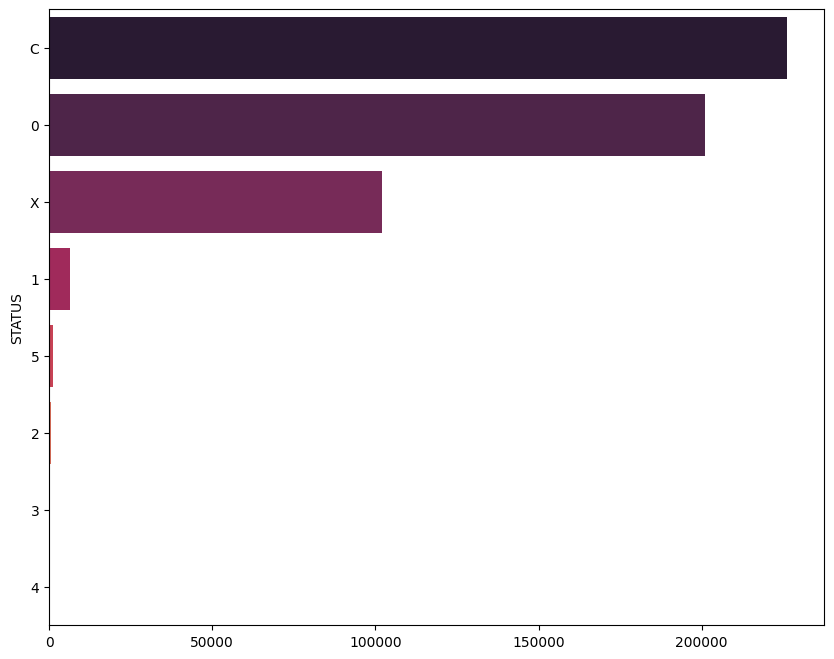

In [42]:
plt.figure(figsize=(10, 8))

sns.barplot(data=df,
            y=df["STATUS"].value_counts().index,
            x=df["STATUS"].value_counts().values,
            palette='rocket')

In [43]:
df['STATUS'].replace("C" , "Good_Debt" , inplace = True)
df['STATUS'].replace("X" , "Good_Debt" , inplace = True)
df['STATUS'].replace("0" , "Good_Debt" , inplace = True)
df['STATUS'].replace("1" , "Good_Debt" , inplace = True)
df['STATUS'].replace("2" , "Bad_Debt" , inplace = True)
df['STATUS'].replace("3" , "Bad_Debt" , inplace = True)
df['STATUS'].replace("4" , "Bad_Debt" , inplace = True)
df['STATUS'].replace("5" , "Bad_Debt" , inplace = True)

/tmp/ipykernel_24/3721178300.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['STATUS'].replace("C" , "Good_Debt" , inplace = True)
/tmp/ipykernel_24/3721178300.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [44]:
df["STATUS"].value_counts()

STATUS
Good_Debt    535705
Bad_Debt       1962
Name: count, dtype: int64

<Axes: xlabel='STATUS', ylabel='count'>

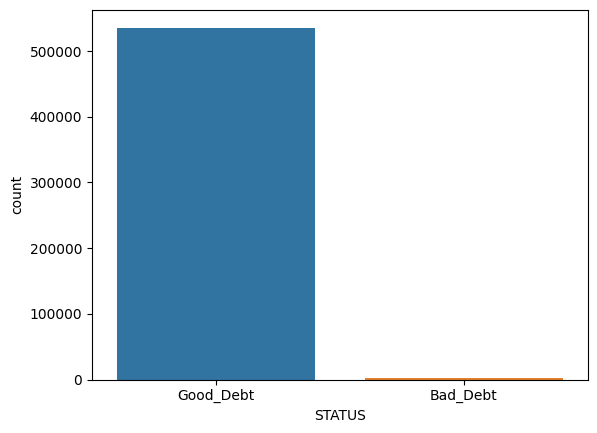

In [45]:
sns.countplot (x='STATUS',data=df)

**imbalance data**

In [46]:
Numerical=df.select_dtypes(exclude='object').columns.tolist()
Numerical

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'MONTHS_BALANCE']

In [47]:
value_count_dict = dict()
for i in Numerical :
    print(i,'column\'s count values : ' )
    index , count = df[i].value_counts().index , df[i].value_counts().values
    value_count_dict['value']  = list(index)
    value_count_dict['count'] = list(count)
    value_count_df = pd.DataFrame(value_count_dict)
    if value_count_df.shape[0]<10:
        display(value_count_df.head(10))
    else :
        display(value_count_df.head())

ID column's count values : 


value  count
0  5054051     61
1  5135783     61
2  5053687     61
3  5139489     61
4  5021419     61

CNT_CHILDREN column's count values : 


value   count
0      0  343151
1      1  127695
2      2   58791
3      3    6549
4      4    1070
5      5     248
6     14     111
7      7      46
8     19       6

AMT_INCOME_TOTAL column's count values : 


value  count
0  135000.0  62694
1  180000.0  51576
2  225000.0  45673
3  157500.0  44484
4  112500.0  40613

DAYS_BIRTH column's count values : 


value  count
0 -14667   1018
1 -15140    928
2 -15675    835
3 -16995    799
4 -12483    793

DAYS_EMPLOYED column's count values : 


value  count
0  -1539   1528
1  -1812   1219
2   -401   1196
3   -309   1154
4  -2531   1122

FLAG_MOBIL column's count values : 


value   count
0      1  537667

FLAG_WORK_PHONE column's count values : 


value   count
0      0  386252
1      1  151415

FLAG_PHONE column's count values : 


value   count
0      0  376962
1      1  160705

FLAG_EMAIL column's count values : 


value   count
0      0  483508
1      1   54159

CNT_FAM_MEMBERS column's count values : 


value   count
0    2.0  279187
1    3.0  109948
2    1.0   84957
3    4.0   55637
4    5.0    6536

MONTHS_BALANCE column's count values : 


value  count
0     -1  17271
1     -2  17203
2     -3  17061
3      0  17043
4     -4  16795

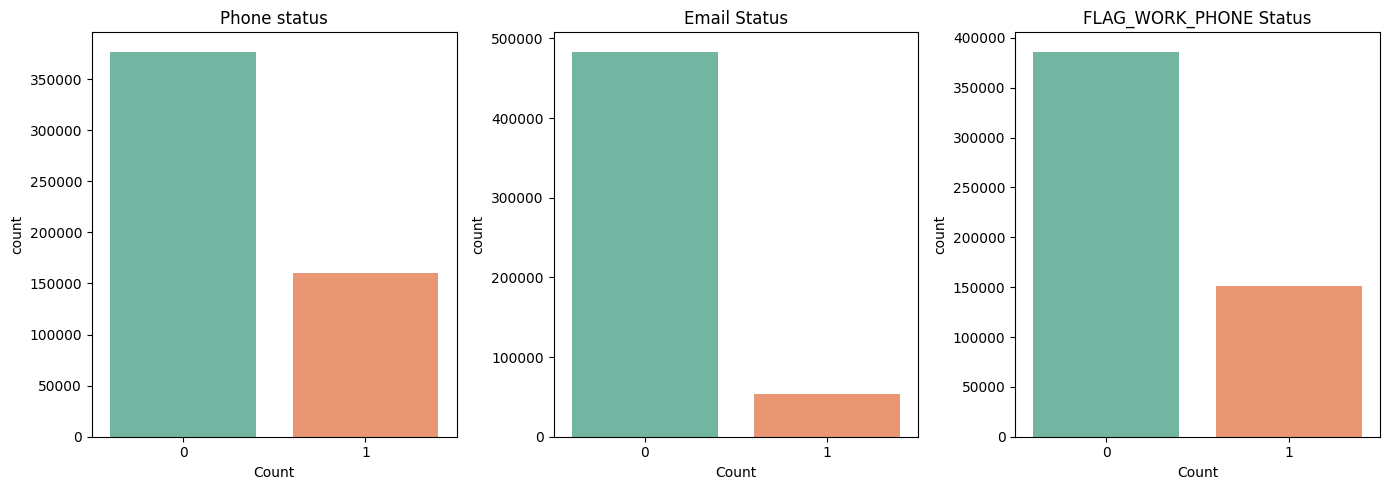

In [48]:
fig, axes = plt.subplots(1,3)

g1=sns.countplot(x=df.FLAG_PHONE,linewidth=1, ax=axes[0],palette="Set2")
g1.set_title("Phone status")
g1.set_xlabel("Count")

g2=sns.countplot(x=df.FLAG_EMAIL,linewidth=1.2, ax=axes[1],palette="Set2")
g2.set_title("Email Status")
g2.set_xlabel("Count")

g3=sns.countplot(x=df.FLAG_WORK_PHONE,linewidth=1.2, ax=axes[2],palette="Set2")
g3.set_title("FLAG_WORK_PHONE Status")
g3.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()


plt.show()

In [49]:
df["CNT_CHILDREN"].value_counts()

CNT_CHILDREN
0     343151
1     127695
2      58791
3       6549
4       1070
5        248
14       111
7         46
19         6
Name: count, dtype: int64

<Axes: xlabel='CNT_CHILDREN'>

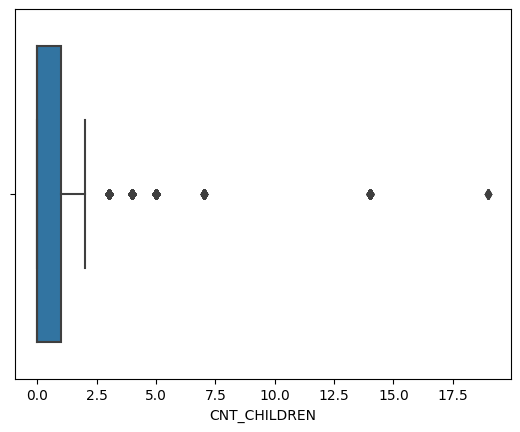

In [50]:

sns.boxplot( x=df["CNT_CHILDREN"])

In [51]:
df["CNT_FAM_MEMBERS"].value_counts()

CNT_FAM_MEMBERS
2.0     279187
3.0     109948
1.0      84957
4.0      55637
5.0       6536
6.0        991
7.0        248
15.0       111
9.0         46
20.0         6
Name: count, dtype: int64

<Axes: xlabel='CNT_FAM_MEMBERS'>

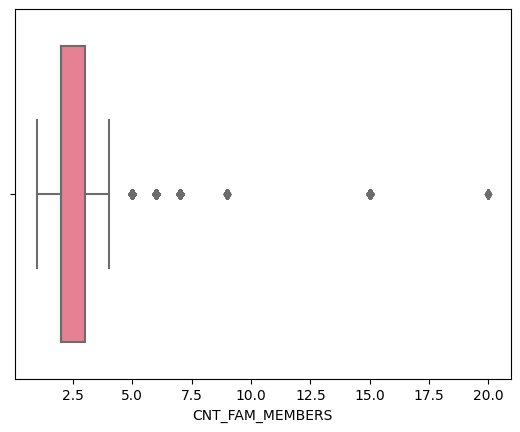

In [52]:
sns.boxplot( x=df["CNT_FAM_MEMBERS"],palette="husl")

In [53]:
df["AMT_INCOME_TOTAL"].agg(["min" , 'max' , 'mean' , "std"])

min     2.700000e+04
max     1.575000e+06
mean    1.971171e+05
std     1.041390e+05
Name: AMT_INCOME_TOTAL, dtype: float64

In [54]:
fig = px.scatter(df, x="AMT_INCOME_TOTAL")
fig.show()

In [55]:
df["DAYS_BIRTH"]

31       -21474
32       -21474
33       -21474
34       -21474
35       -21474
          ...  
777710    -9188
777711    -9188
777712    -9188
777713    -9188
777714    -9188
Name: DAYS_BIRTH, Length: 537667, dtype: int64

In [56]:
df["DAYS_BIRTH"].agg(["min" , 'max'])

min   -24611
max    -7489
Name: DAYS_BIRTH, dtype: int64

In [57]:


df['DAYS_BIRTH'] = datetime.strptime("2024-01-01", "%Y-%m-%d") + df['DAYS_BIRTH'].apply(pd.offsets.Day)

In [58]:
df['DAYS_BIRTH']

31        1965-03-17 00:00:00
32        1965-03-17 00:00:00
33        1965-03-17 00:00:00
34        1965-03-17 00:00:00
35        1965-03-17 00:00:00
                 ...         
777710    1998-11-05 00:00:00
777711    1998-11-05 00:00:00
777712    1998-11-05 00:00:00
777713    1998-11-05 00:00:00
777714    1998-11-05 00:00:00
Name: DAYS_BIRTH, Length: 537667, dtype: object

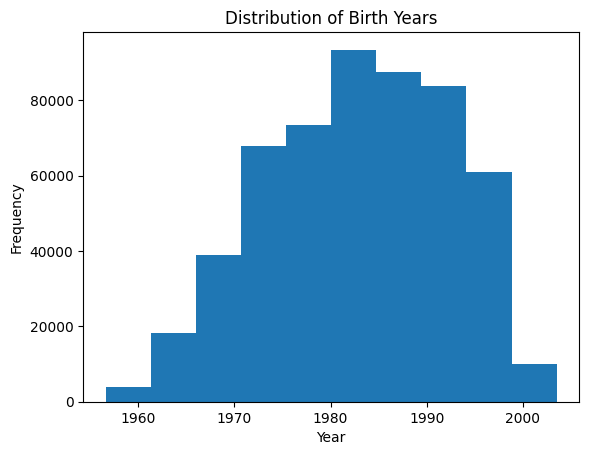

In [59]:
plt.hist(df['DAYS_BIRTH'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Birth Years')
plt.show()

In [60]:
df["DAYS_EMPLOYED"]

31       -1134
32       -1134
33       -1134
34       -1134
35       -1134
          ... 
777710   -1193
777711   -1193
777712   -1193
777713   -1193
777714   -1193
Name: DAYS_EMPLOYED, Length: 537667, dtype: int64

In [61]:
df["DAYS_EMPLOYED"].agg(["min" , 'max'])

min   -15713
max      -17
Name: DAYS_EMPLOYED, dtype: int64

In [62]:

df['DAYS_EMPLOYED'] = datetime.strptime("2024-01-01", "%Y-%m-%d") + df['DAYS_EMPLOYED'].apply(pd.offsets.Day)

In [63]:
df['DAYS_EMPLOYED'] 

31        2020-11-23 00:00:00
32        2020-11-23 00:00:00
33        2020-11-23 00:00:00
34        2020-11-23 00:00:00
35        2020-11-23 00:00:00
                 ...         
777710    2020-09-25 00:00:00
777711    2020-09-25 00:00:00
777712    2020-09-25 00:00:00
777713    2020-09-25 00:00:00
777714    2020-09-25 00:00:00
Name: DAYS_EMPLOYED, Length: 537667, dtype: object

In [64]:
df["DAYS_EMPLOYED"].agg(["min" , 'max'])

min   1980-12-24
max   2023-12-15
Name: DAYS_EMPLOYED, dtype: datetime64[ns]

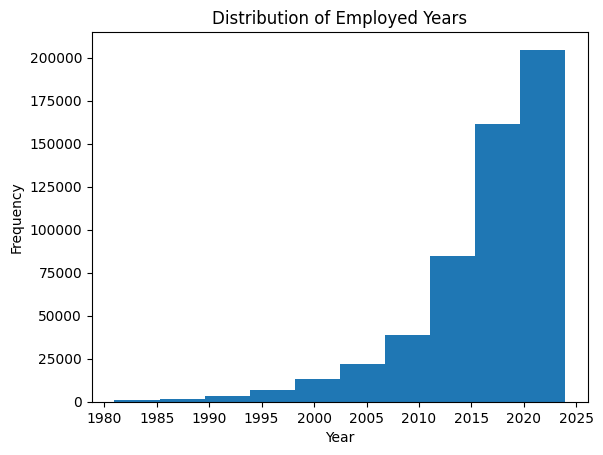

In [65]:
plt.hist(df['DAYS_EMPLOYED'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Employed Years')
plt.show()

**right skweness**

In [66]:
df["MONTHS_BALANCE"]

31         0
32        -1
33        -2
34        -3
35        -4
          ..
777710    -9
777711   -10
777712   -11
777713   -12
777714   -13
Name: MONTHS_BALANCE, Length: 537667, dtype: int64

In [67]:
df["MONTHS_BALANCE"]=df["MONTHS_BALANCE"]*-1

In [68]:
df["MONTHS_BALANCE"]

31         0
32         1
33         2
34         3
35         4
          ..
777710     9
777711    10
777712    11
777713    12
777714    13
Name: MONTHS_BALANCE, Length: 537667, dtype: int64

In [69]:
df["MONTHS_BALANCE"].agg(["min" , 'max'])

min     0
max    60
Name: MONTHS_BALANCE, dtype: int64

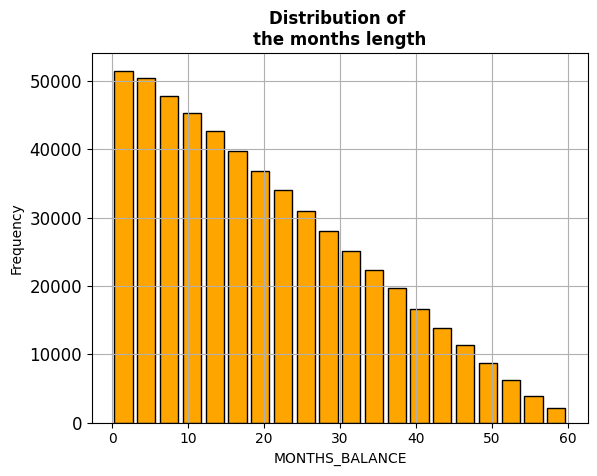

In [70]:
ax = df["MONTHS_BALANCE"].hist( # Remove grid
                        xlabelsize=10, # Change size of labels on the x-axis
                        ylabelsize=12, # Change size of labels on the y-axis
                        bins=20, # Number of bins
                        edgecolor='black', # Color of the border
                        color='orange', # Color of the bins
                        rwidth=0.8 # Space between bins
                       )

# Add a bold title ('\n' allow us to jump rows)
ax.set_title('Distribution of \nthe months length',
             weight='bold') 

# Add label names
ax.set_xlabel('MONTHS_BALANCE')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

***left skweness*******

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537667 entries, 31 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  int64  
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_INCOME_TYPE     537667 non-null  object 
 7   NAME_EDUCATION_TYPE  537667 non-null  object 
 8   NAME_FAMILY_STATUS   537667 non-null  object 
 9   NAME_HOUSING_TYPE    537667 non-null  object 
 10  DAYS_BIRTH           537667 non-null  object 
 11  DAYS_EMPLOYED        537667 non-null  object 
 12  FLAG_MOBIL           537667 non-null  int64  
 13  FLAG_WORK_PHONE      537667 non-null  int64  
 14  FLAG_PHONE           537667 non-null  int64  
 15  FLAG_EMAIL           

# Preprocessing

visualization clear to us some issues about data like:
*   some coulumns have imbalanced like status and email_status
*   some coulumns have oultiers like AMT_INCOME_TOTAL,CNT_FAM_MEMBERS and CNT_CHILDREN
*   coulums have skweness like DAYS_EMPLOYED
*    normalize data


**handling outliers**

In [72]:
# Select the columns where you want to remove outliers
columns_to_filter = ['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN']

# Calculate lower and upper bounds for each selected column
lower_bounds = df[columns_to_filter].quantile(0.05)
upper_bounds = df[columns_to_filter].quantile(0.90)

# Define the boundaries for outlier removal
lower_bound_limits = lower_bounds - 0.05 * (upper_bounds - lower_bounds)
upper_bound_limits = upper_bounds + 0.05 * (upper_bounds - lower_bounds)

# Filter out the rows containing outliers in any of the selected columns
df = df[~((df[columns_to_filter] < lower_bound_limits) | (df[columns_to_filter] > upper_bound_limits)).any(axis=1)]


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469233 entries, 31 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   469233 non-null  int64  
 1   CODE_GENDER          469233 non-null  object 
 2   FLAG_OWN_CAR         469233 non-null  object 
 3   FLAG_OWN_REALTY      469233 non-null  object 
 4   CNT_CHILDREN         469233 non-null  int64  
 5   AMT_INCOME_TOTAL     469233 non-null  float64
 6   NAME_INCOME_TYPE     469233 non-null  object 
 7   NAME_EDUCATION_TYPE  469233 non-null  object 
 8   NAME_FAMILY_STATUS   469233 non-null  object 
 9   NAME_HOUSING_TYPE    469233 non-null  object 
 10  DAYS_BIRTH           469233 non-null  object 
 11  DAYS_EMPLOYED        469233 non-null  object 
 12  FLAG_MOBIL           469233 non-null  int64  
 13  FLAG_WORK_PHONE      469233 non-null  int64  
 14  FLAG_PHONE           469233 non-null  int64  
 15  FLAG_EMAIL           

<Axes: >

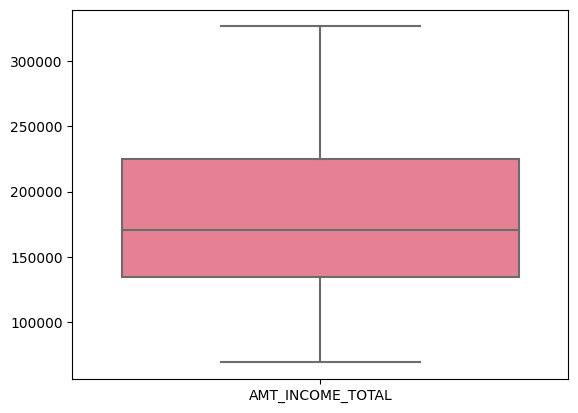

In [74]:
sns.boxplot( data=df[["AMT_INCOME_TOTAL"]],palette="husl")

<Axes: >

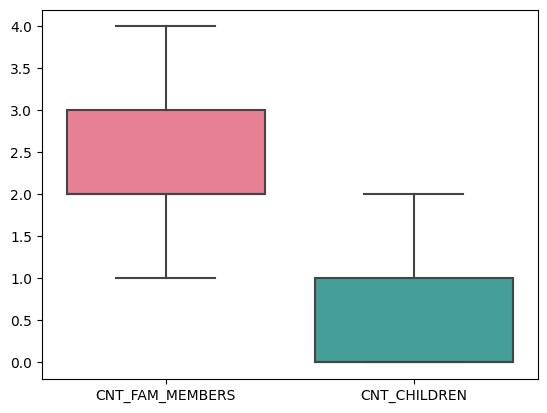

In [75]:
sns.boxplot( data=df[["CNT_FAM_MEMBERS","CNT_CHILDREN"]],palette="husl")

#### label_encoding

In [76]:
lst = list(df.select_dtypes('object').columns)

 

for i in lst :

  lb = LabelEncoder()

  df[i] = lb.fit_transform(df[i])

/tmp/ipykernel_24/2452270820.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_24/2452270820.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_24/2452270820.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_24/2452270

In [77]:
df=df.drop(["FLAG_PHONE"], axis=1)

In [78]:
x = df.drop(["ID",'STATUS'], axis=1)
y = df['STATUS']

### oversampling data

In [79]:


# Assuming x and y are your feature and target variables respectively
smote = SMOTE()
X_balance, Y_balance = smote.fit_resample(x, y)


In [80]:

x_train, x_test, y_train, y_test = train_test_split(X_balance, Y_balance, test_size=0.2, random_state=16)


In [81]:
# Skew function of Pandas
old_skew = df.skew().sort_values(ascending=False)
old_skew

NAME_HOUSING_TYPE       3.100164
FLAG_EMAIL              2.701372
NAME_FAMILY_STATUS      1.322829
CNT_CHILDREN            1.167158
FLAG_WORK_PHONE         0.969496
MONTHS_BALANCE          0.605439
CODE_GENDER             0.519203
CNT_FAM_MEMBERS         0.515906
AMT_INCOME_TOTAL        0.476658
FLAG_OWN_CAR            0.323653
OCCUPATION_TYPE         0.123646
ID                      0.051409
DAYS_BIRTH              0.003881
FLAG_MOBIL              0.000000
DAYS_EMPLOYED          -0.191779
FLAG_OWN_REALTY        -0.580859
NAME_INCOME_TYPE       -0.768039
NAME_EDUCATION_TYPE    -0.862577
STATUS                -16.567856
dtype: float64

#### handling skewness 

In [82]:
power = PowerTransformer(method='yeo-johnson')
x_train = power.fit_transform(x_train)
x_test = power.fit_transform(x_test)

In [83]:
# normalizer = StandardScaler()
# x_train = normalizer.fit_transform(x_train)
# x_test = normalizer.fit_transform(x_test)

### Modeling & evaluation
* LogisticRegression
* RandomForestClassifier
* XGBClassifier


**LogisticRegression**

In [84]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
print('Logistic Model  Train Accuracy : ',log_model.score(x_train, y_train)*100, '%')
print('Logistic Model Test Accuracy : ', log_model.score(x_test, y_test)*100, '%')

prediction = log_model.predict(x_test)
      


Logistic Model  Train Accuracy :  61.17259550280924 %
Logistic Model Test Accuracy :  61.129202158092575 %


In [85]:
print('\nClassification report:')      
print(classification_report(y_test, prediction))




Classification report:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61     93356
           1       0.61      0.61      0.61     93661

    accuracy                           0.61    187017
   macro avg       0.61      0.61      0.61    187017
weighted avg       0.61      0.61      0.61    187017



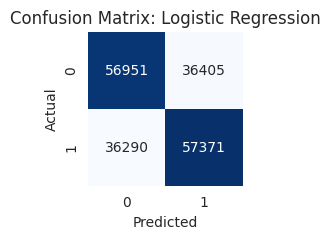

In [86]:

conf_matrix = confusion_matrix(y_test, prediction)

# Plot confusion matrix
plt.figure(figsize=(2, 2))
sns.set_style('white')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

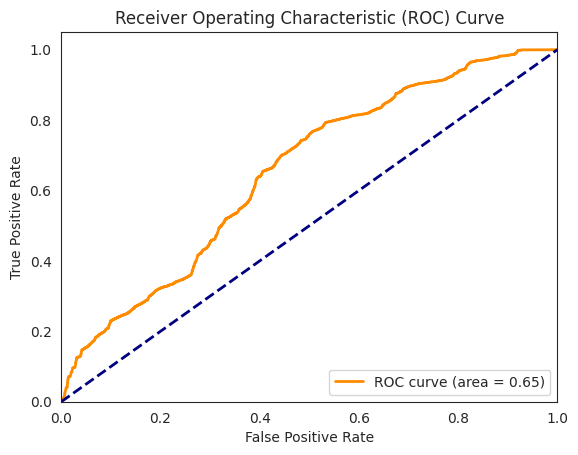

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming model2 is your trained classification model
# Assuming x_test and y_test are your test features and labels, respectively

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(x_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**RandomForestClassifier**

In [88]:
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)
print("RandomForest Train Accuracy = ",model.score(x_train, y_train))
y_predict = model.predict(x_test)
print("RandomForest Test Accuracy = " , accuracy_score(y_test, y_predict))
print("F1 = " , f1_score(y_test, y_predict))



RandomForest Train Accuracy =  0.9940406407447461
RandomForest Test Accuracy =  0.9919205205943845
F1 =  0.9918926894701543


In [89]:
      
print('\nClassification report:')      
print(classification_report(y_test, y_predict))


Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     93356
           1       1.00      0.99      0.99     93661

    accuracy                           0.99    187017
   macro avg       0.99      0.99      0.99    187017
weighted avg       0.99      0.99      0.99    187017



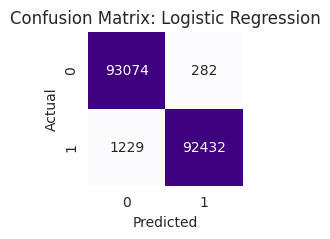

In [90]:

conf_matrix = confusion_matrix(y_test, y_predict)

# Plot confusion matrix
plt.figure(figsize=(2, 2))
sns.set_style('white')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

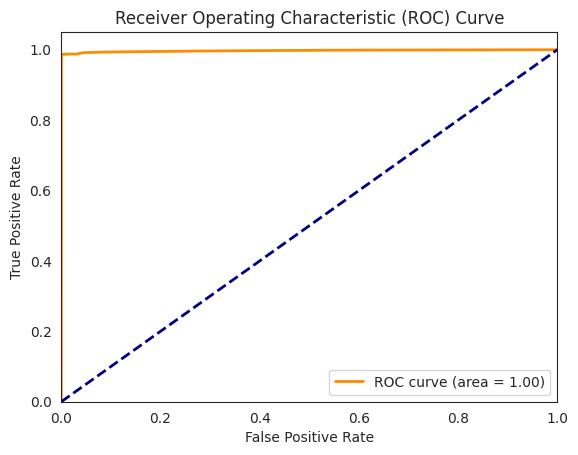

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming model2 is your trained classification model
# Assuming x_test and y_test are your test features and labels, respectively

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**XGBoost**

In [92]:
model2 =  XGBClassifier()
model2.fit(x_train, y_train)
print(" XGB Train Accuracy = " ,model2.score(x_train, y_train))
y_predict = model.predict(x_test)
print(" XGB Test Accuracy = " , accuracy_score(y_test, y_predict))
print("F1 = " , f1_score(y_test, y_predict))

      


 XGB Train Accuracy =  0.9872391109352504
 XGB Test Accuracy =  0.9919205205943845
F1 =  0.9918926894701543


In [93]:
print('\nClassification report:')      
print(classification_report(y_test, y_predict))


Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     93356
           1       1.00      0.99      0.99     93661

    accuracy                           0.99    187017
   macro avg       0.99      0.99      0.99    187017
weighted avg       0.99      0.99      0.99    187017



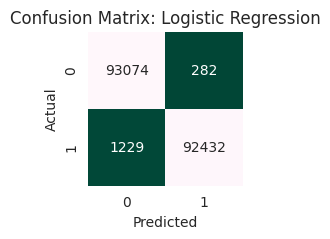

In [94]:

# Plot confusion matrix
plt.figure(figsize=(2,2))
sns.set_style('white')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBuGn_r', cbar=False)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

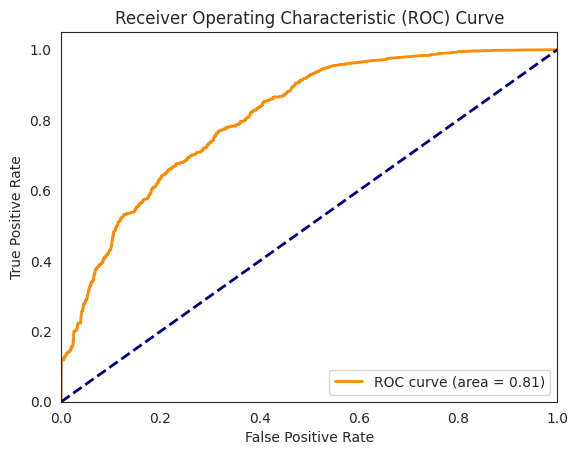

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming model2 is your trained classification model
# Assuming x_test and y_test are your test features and labels, respectively

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model2.predict_proba(x_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


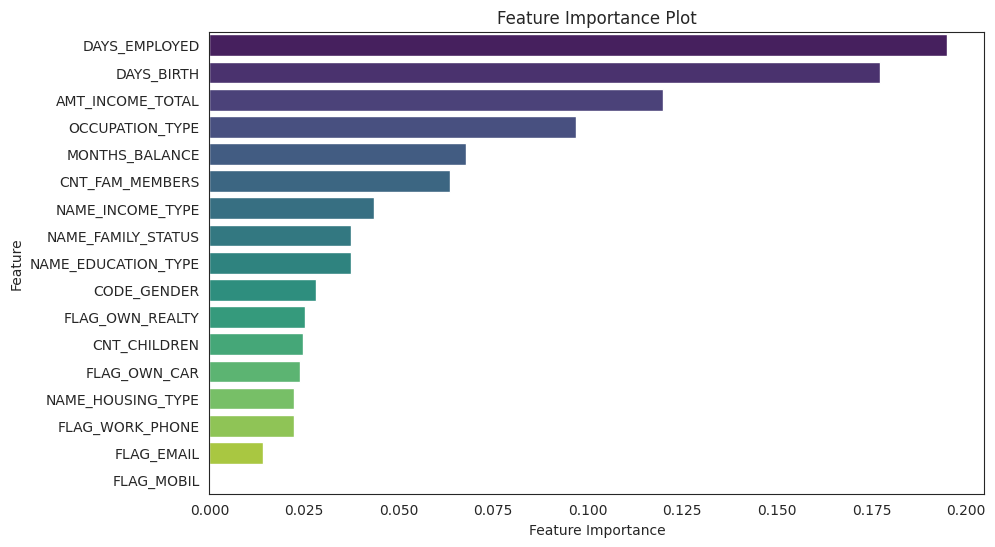

In [96]:
feat_importances = model.feature_importances_

# Create a pandas Series with feature importances
feat_importances_series = pd.Series(feat_importances, index=df.columns[1:-1])

# Sort feature importances in descending order
feat_importances_series = feat_importances_series.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances_series.values, y=feat_importances_series.index, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

In [97]:
# pip install pycaret


In [98]:
# from pycaret.regression import *
# from pycaret.classification import *